In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import glob,re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
param_pattern = re.compile(r'\d\d-\d\d-\d\d \d{6}_5node_(sin|tri|sqr|saw)_(notests|tests)')
def getData(subpat):
    d = {}
    for f in glob.glob(subpat):
        inptype,tests = param_pattern.findall(f)[0]
        if(inptype not in d.keys()):
            d[inptype]= {}
        if(tests not in d[inptype].keys()):
            d[inptype][tests] = []
        
        data = pd.read_csv(f)
        if(data.shape[0] > 0 and data.shape[1] > 0):
            d[inptype][tests].append(data)
    return d

In [3]:
def calcAveAndStd(data):
    n = len(data)
    
    ave = data[0].copy()
    for d in data[1:]:
        ave += d.copy()
    
    ave = ave / n
    
    std = (ave - data[0].copy())**2
    for d in data[1:]:
        std += (ave - d.copy())**2
    
    std = (std / n).apply(np.sqrt)
    std['Generation'] = ave.copy()['Generation']
    return ave,std

In [4]:
def calcAveAndStd(data):
    n = len(data)
    
    ave = data[0].copy()
    for d in data[1:]:
        ave += d.copy()
    
    ave = ave / n
    
    std = (ave - data[0].copy())**2
    for d in data[1:]:
        std += (ave - d.copy())**2
    
    std = (std / n).apply(np.sqrt)
    std['Generation'] = ave.copy()['Generation']
    return ave,std

In [5]:
def calcAllStats(data):
    aves,stds = {},{}

    for inptype in data.keys():
        for tests in data[inptype]:
            if(tests not in aves.keys()):
                aves[tests],stds[tests] = {},{}
            if(len(data[inptype][tests]) is not 0):
                aves[tests][inptype],stds[tests][inptype] = calcAveAndStd(data[inptype][tests])
    return aves,stds

In [6]:
def gaTrace(data,error,sortedKeys = None,ci_multipler = 1.95,fig=None,ax=None):
    
    if(sortedKeys is None):
        sortedKeys = sorted(data.keys())
    
    n = len(sortedKeys)
    
    seaborn.set_style('white')
    seaborn.set_context("paper", font_scale=3, rc={"lines.linewidth": 1.5})
    # colors = seaborn.cubehelix_palette(7, start=1, rot=-5,dark=.1, light=.5)
    colors = seaborn.husl_palette(n,l=.4)
    shaded = np.hstack([colors,0.25*np.ones((n,1))])
    
    if(fig is None or ax is None):
        fig,ax = plt.subplots(figsize=(9,7))
    
    for i,k in enumerate(sortedKeys):
        u = data[k]['Max fitness']
        ci = error[k]['Max fitness']*ci_multipler

        ax.plot(u,color=colors[i],label=k)
        ax.fill_between(data[k]['Generation']-1,u-ci,u+ci,color=shaded[i])

    plt.subplots_adjust(left=0.15)
        
#     plt.ylim([0.6,1.])
        
    return fig,ax

In [7]:
def drawAllGAPlots(aves,stds):
    for inptype in aves.keys():
        fig,ax = gaTrace(aves[inptype],stds[inptype])

        plt .title("%s" % (inptype))
        plt.ylabel('Maximum fitness')
        plt.xlabel('Generation')
        plt.legend(loc='lower right')
        fig.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


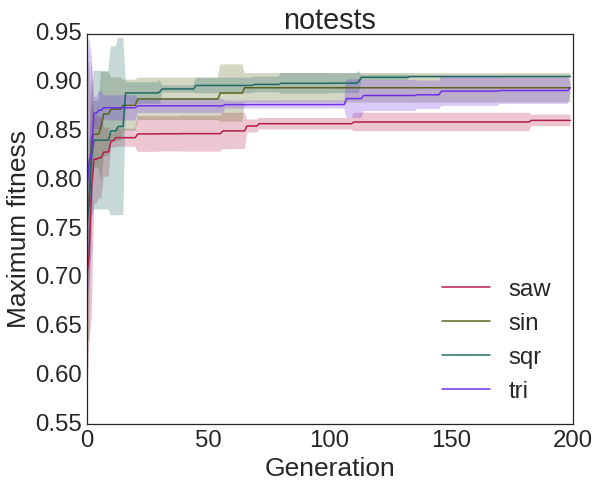

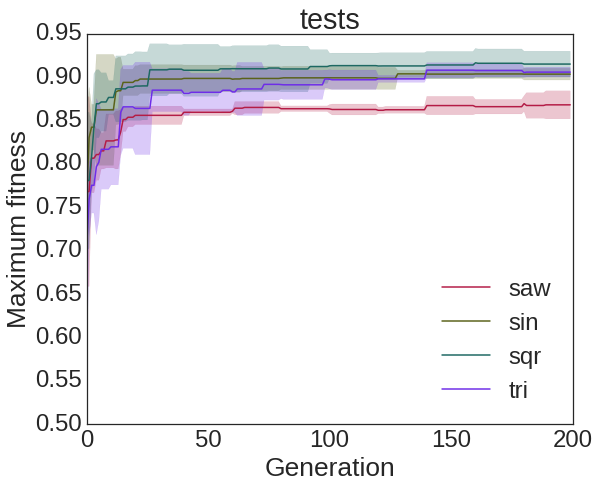

In [10]:
modelStats = getData('*/GA/modelStats*')
model_amp_aves,model_amp_std = calcAllStats(modelStats)
drawAllGAPlots(model_amp_aves,model_amp_std)

In [11]:
from scipy import stats


tests,notests = [],[]

for typ in modelStats.keys():
    for d in modelStats[typ]['notests']:
        notests.append(d['Max fitness'].irow(-1))
    for d in modelStats[typ]['tests']:
        tests.append(d['Max fitness'].irow(-1))


print("tests:\t\tmean=%.2f\tstdev=%.2f\tN=%d" % (np.mean(tests),np.std(tests),len(tests)))
print("notests:\tmean=%.2f\tstdev=%.2f\tN=%d" % (np.mean(notests), np.std(notests),len(notests)))
        
        
t,p =stats.ttest_ind(tests,notests,equal_var=False)
p /= 2
print("t=%.2f, p=%f" % (t,p))

tests:		mean=0.90	stdev=0.02	N=12
notests:	mean=0.89	stdev=0.02	N=12
t=1.15, p=0.132186


In [12]:
ctrnnExp = getData('*/inspector/evolvedLOG_exp*')
fixedExp = getData('*/inspector/fixedLOG_exp*')
ctrnnStd = getData('*/inspector/evolvedLOG_std*')
fixedStd = getData('*/inspector/fixedLOG_std*')
ctrnnExp

{'saw': {'notests': [        neur0    input0     neur1  input1     neur2  input2     neur3  input3  \
   0    0.459227 -0.000000  0.464096       0  0.468016       0  0.455313       0   
   1    0.532388 -0.004740  0.435706       0  0.410363       0  0.444634       0   
   2    0.601431 -0.009479  0.409213       0  0.357563       0  0.434516       0   
   3    0.664964 -0.014219  0.384664       0  0.310244       0  0.424918       0   
   4    0.721978 -0.018958  0.362043       0  0.268546       0  0.415796       0   
   5    0.771927 -0.023698  0.341286       0  0.232263       0  0.407104       0   
   6    0.814734 -0.028437  0.322297       0  0.200980       0  0.398797       0   
   7    0.850712 -0.033177  0.304962       0  0.174186       0  0.390834       0   
   8    0.880453 -0.037916  0.289156       0  0.151336       0  0.383178       0   
   9    0.904705 -0.042656  0.274755       0  0.131907       0  0.375797       0   
   10   0.924271 -0.047395  0.261638       0  0.115414    

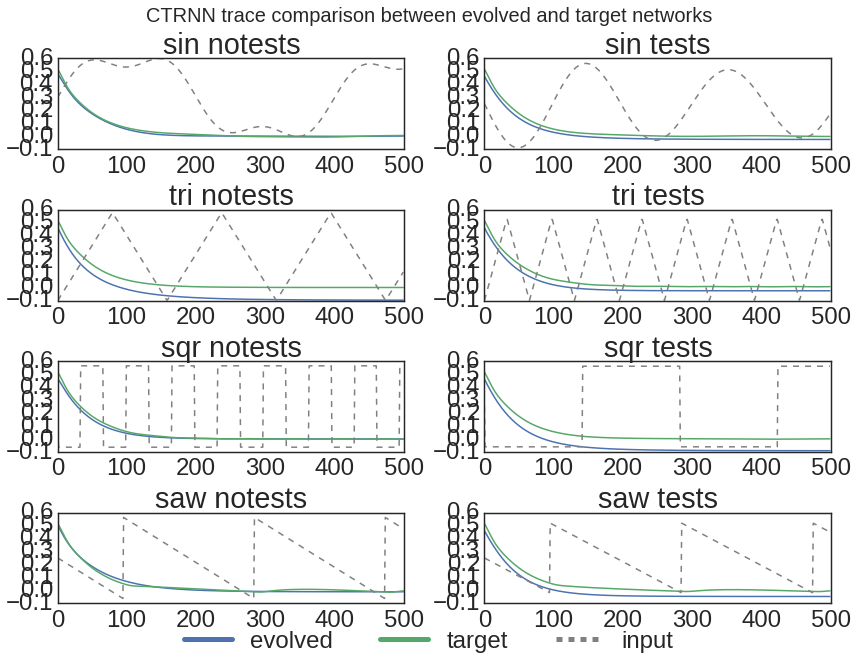

In [17]:
from matplotlib import patches,lines

fig,axes = plt.subplots(4,2,figsize=(9,5))
inputax = []

def plotCTRNN(ax,typ,tests,index=0):
    ax.set_title("%s %s" % (typ,tests))
    line1=ax.plot(ctrnnExp[typ][tests][index]['neur4'],label='model')
    line2=ax.plot(fixedExp[typ][tests][index]['neur4'],label='target')
    inputax.append(ax.twinx())
    inputax[-1].plot(fixedExp[typ][tests][index]['input0'],color='gray',linestyle='--')
    inputax[-1].set_yticklabels([])

index = 0
for i,typ in enumerate(ctrnnExp.keys()):
    for j,tests in enumerate(ctrnnExp[typ]):        
        plotCTRNN(axes[i,j],typ,tests,index=index)
    
# plotCTRNN(axes[1],'saw',50,0.5,index=index)
# plotCTRNN(axes[2],'saw',50,0.75,index=index)
# plotCTRNN(axes[3],'saw',100,0.25,index=index)
# plotCTRNN(axes[4],'saw',100,0.5,index=index)
# plotCTRNN(axes[5],'saw',100,0.75,index=index)
# plotCTRNN(axes[6],'saw',150,0.25,index=index)
# plotCTRNN(axes[7],'saw',150,0.5,index=index)
# plotCTRNN(axes[8],'saw',150,0.75,index=index)

fig.set_size_inches(12,9)


model_patch = lines.Line2D([0],[0],color=seaborn.color_palette()[0],linewidth=5)
target_patch = lines.Line2D([0],[0],color=seaborn.color_palette()[1],linewidth=5)
input_line = lines.Line2D([0],[0],color='gray',linestyle='--',linewidth=5)

plt.figlegend([model_patch,target_patch,input_line],['evolved','target','input'],'lower center',ncol=3,bbox_to_anchor = (0,-0.05,1,1),
            bbox_transform = plt.gcf().transFigure)

fig.suptitle('CTRNN trace comparison between evolved and target networks',fontsize=20)
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()